Import dataset and information of dataset


In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# 1. Load the dataset
data = load_wine()

# Convert to a Pandas DataFrame for easier handling
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Print the required information
print("Data Loaded Successfully.")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"Size (Total elements): {df.size}")

# Optional: Show the first few rows to verify
print("\nFirst 5 rows:")
print(df.head())

Data Loaded Successfully.
Number of Rows: 178
Number of Columns: 13
Size (Total elements): 2314

First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  

4.1 Rescaling a Feature(Use scikit-learn's MinMaxScaler to rescale a feature array (using the 'Magnesium' ))

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_wine

# Create a feature (selecting 'magnesium')
feature = df[['magnesium']].values.astype(float)

# Create scaler
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scale feature
scaled_feature = minmax_scaler.fit_transform(feature)

scaled_feature[:5]

array([[0.61956522],
       [0.32608696],
       [0.33695652],
       [0.4673913 ],
       [0.52173913]])

graph comparing the original and scaled Magnesium values.

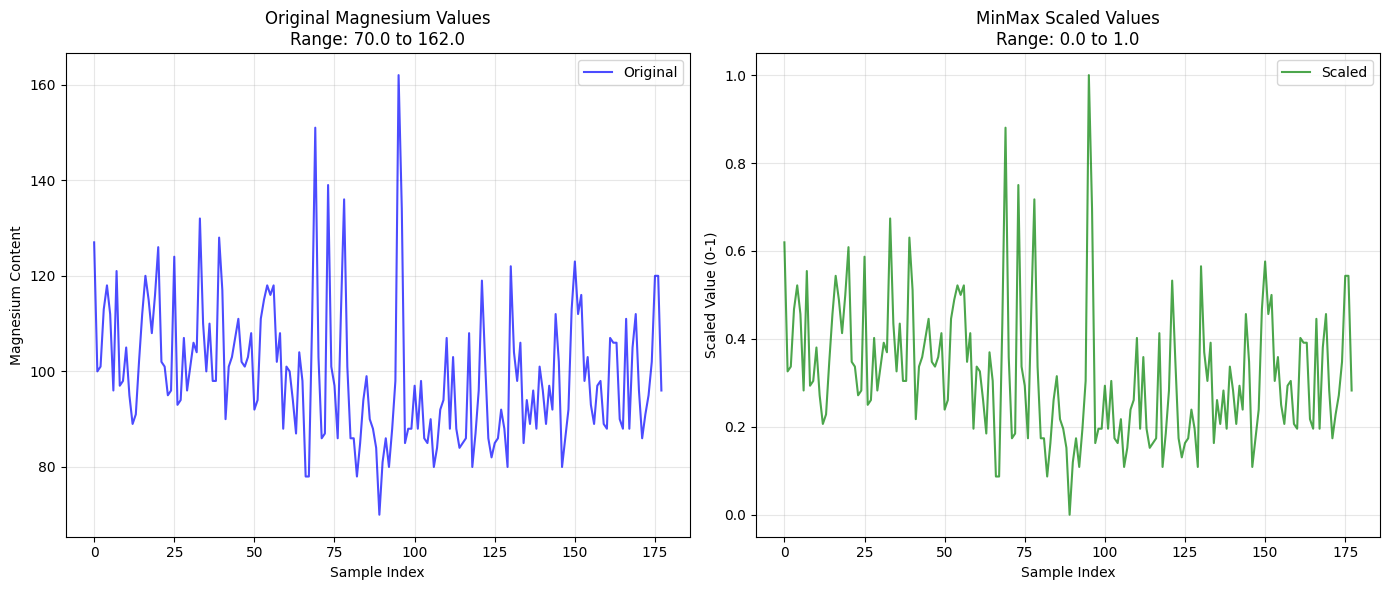

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load Data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Select the Feature (Magnesium)
# We use .values to get the numpy array and .astype(float) for precision
feature = df[['magnesium']].values.astype(float)

# 3. Apply MinMax Scaling
# This squeezes the data between 0 and 1
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_feature = minmax_scaler.fit_transform(feature)

# 4. Plotting the Comparison
plt.figure(figsize=(14, 6))

# Graph 1: Original Data
plt.subplot(1, 2, 1)
plt.plot(feature, color='blue', alpha=0.7, label='Original')
plt.title(f"Original Magnesium Values\nRange: {feature.min()} to {feature.max()}")
plt.xlabel("Sample Index")
plt.ylabel("Magnesium Content")
plt.grid(True, alpha=0.3)
plt.legend()

# Graph 2: Scaled Data
plt.subplot(1, 2, 2)
plt.plot(scaled_feature, color='green', alpha=0.7, label='Scaled')
plt.title(f"MinMax Scaled Values\nRange: {scaled_feature.min():.1f} to {scaled_feature.max():.1f}")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Value (0-1)")
plt.grid(True, alpha=0.3)
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

scale ALL features at once

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load Data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Create Scaler
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# 3. Scale EVERYTHING (Fit & Transform the whole DataFrame)
# Notice we are passing 'df', not just one column
scaled_data_all = minmax_scaler.fit_transform(df)

# 4. Convert back to a readable table (DataFrame) to see results
df_scaled = pd.DataFrame(scaled_data_all, columns=data.feature_names)

# Show the first 5 rows of the fully scaled dataset
print(df_scaled.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# 1. Setup Data
# We use the Wine dataset and select only 2 features for clear 2D plotting
# Feature 0: Alcohol, Feature 1: Malic Acid
data = load_wine()
X = data.data[:, :2]

# Helper function to handle plotting repetitive tasks
def plot_comparison(original, transformed, method_name, x_label="Alcohol", y_label="Malic Acid"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Original
    axes[0].scatter(original[:, 0], original[:, 1], c='blue', alpha=0.5)
    axes[0].set_title("Before: Original Data")
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    axes[0].grid(True, alpha=0.3)

    # Plot Transformed
    axes[1].scatter(transformed[:, 0], transformed[:, 1], c='green', alpha=0.5)
    axes[1].set_title(f"After: {method_name}")
    axes[1].set_xlabel(f"Transformed {x_label}")
    axes[1].set_ylabel(f"Transformed {y_label}")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

graph comparing the original and scaled for all features

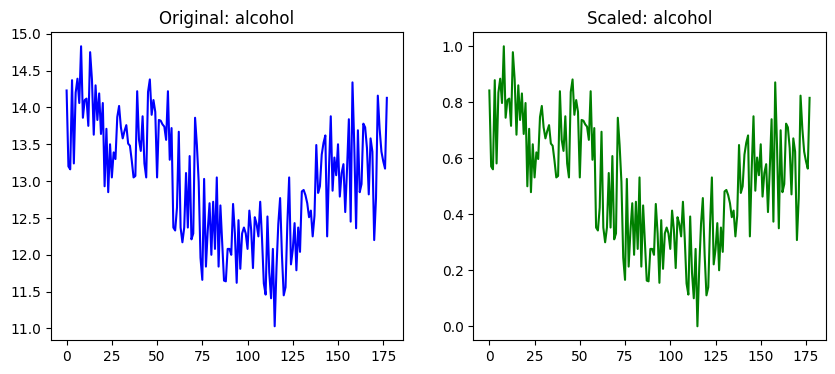

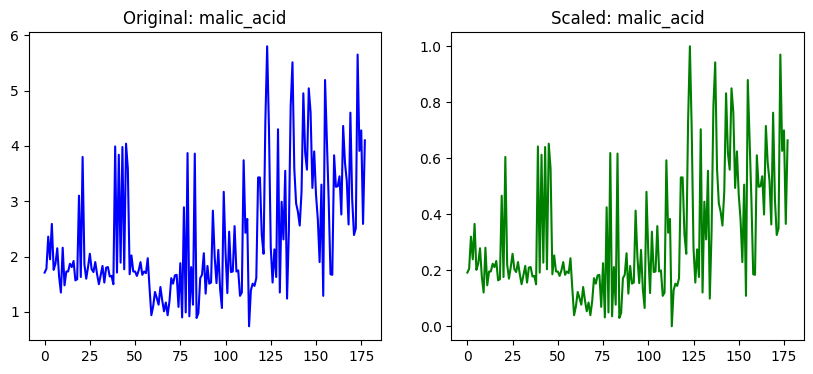

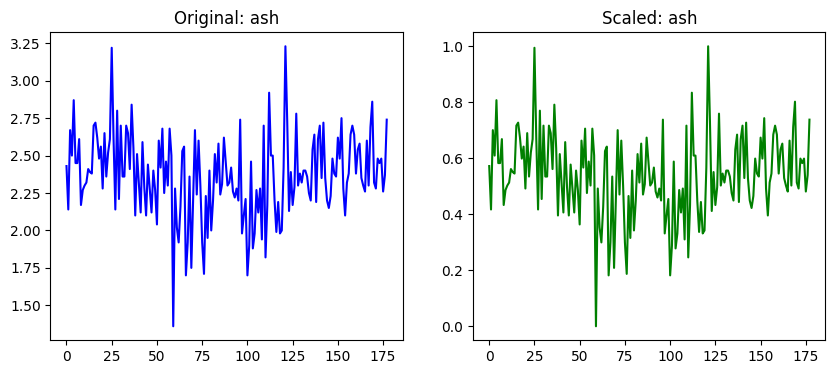

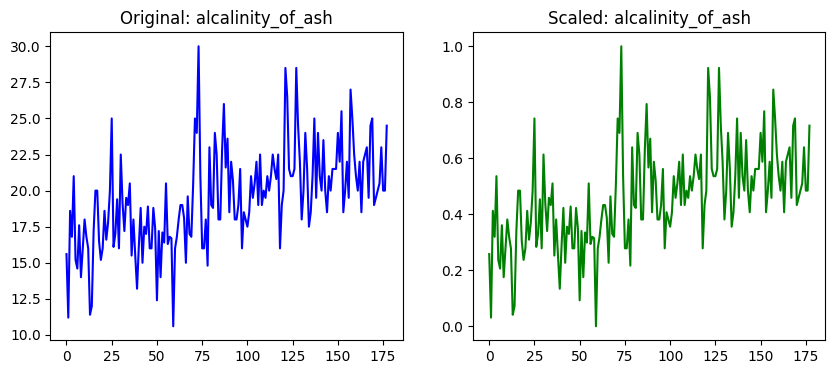

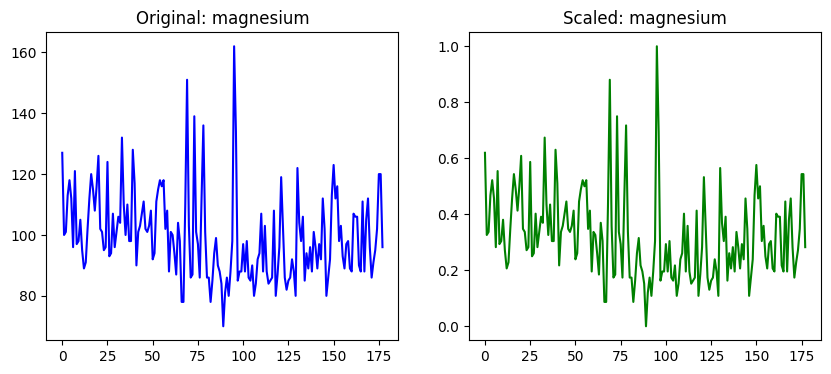

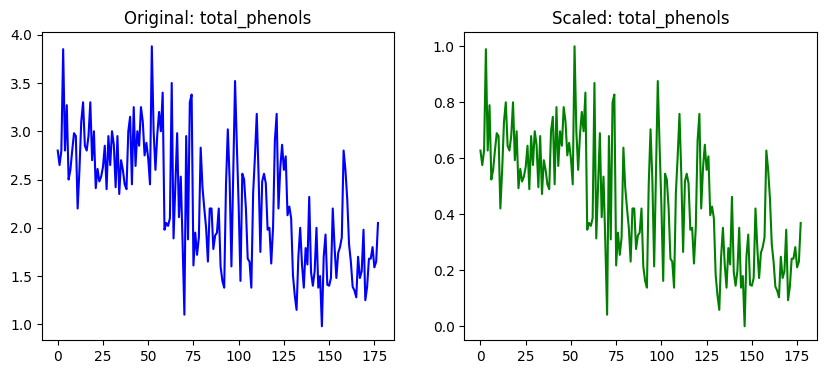

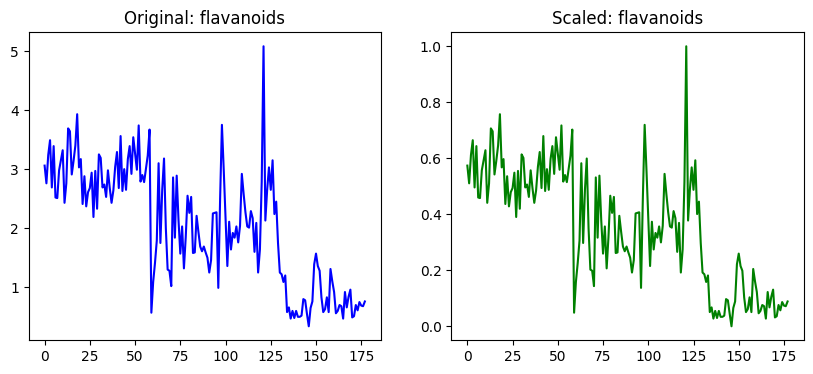

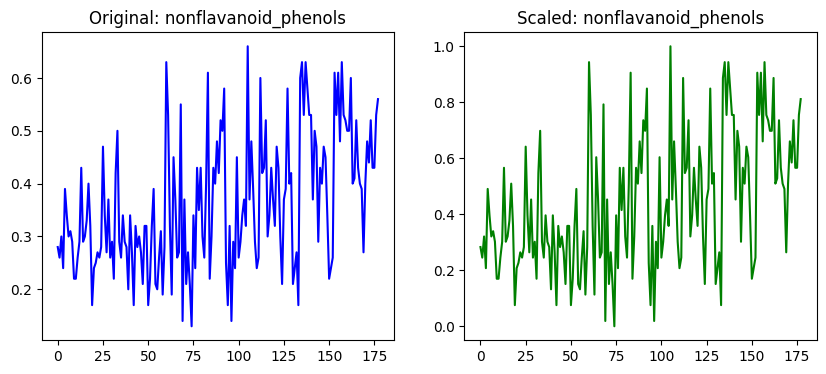

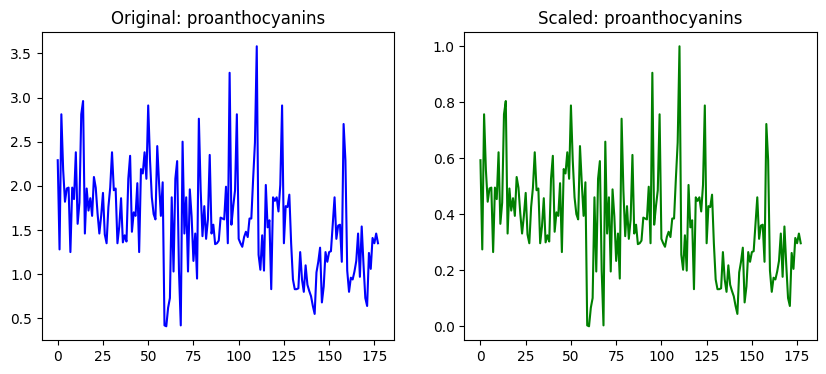

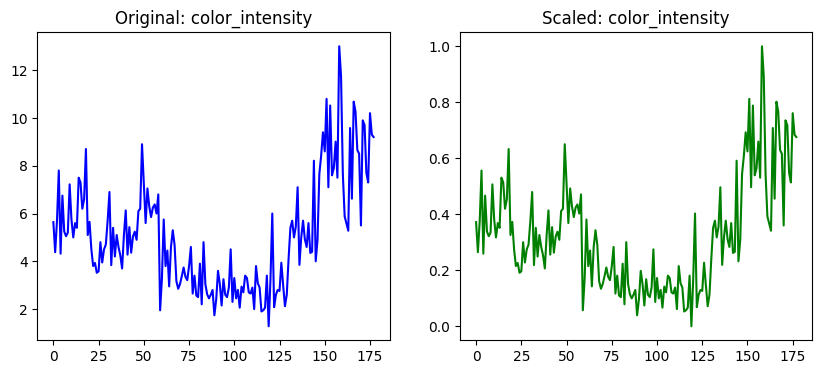

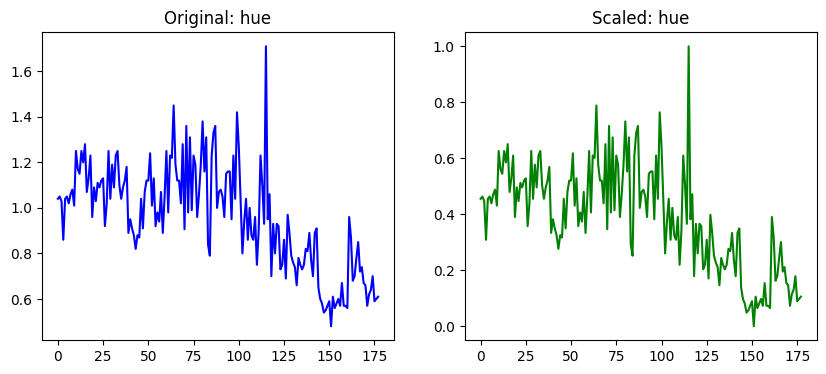

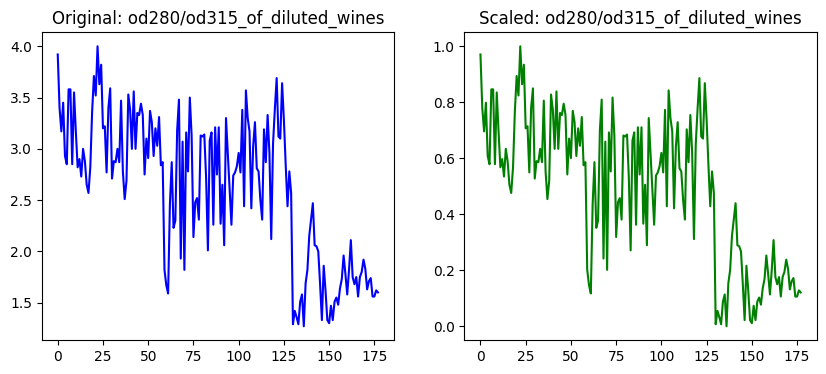

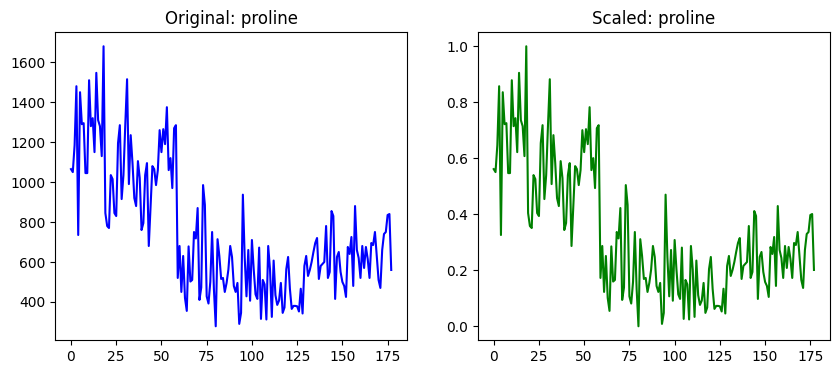

In [ ]:
# Loop through every column and plot
for col in df.columns:
    plt.figure(figsize=(10, 4))

    # Original
    plt.subplot(1, 2, 1)
    plt.plot(df[col], color='blue')
    plt.title(f"Original: {col}")

    # Scaled
    plt.subplot(1, 2, 2)
    plt.plot(df_scaled[col], color='green')
    plt.title(f"Scaled: {col}")

    plt.show()

Standardizing a Feature(proline)
StandardScaler (which uses the Mean)

In [ ]:

import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load the Wine Dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Select the 'proline' feature
# We use double brackets [['proline']] to keep it as a DataFrame/2D array
feature = df[['proline']].values

# 3. Create the Standard Scaler
scaler = preprocessing.StandardScaler()

# 4. Transform the feature (Math: (x - mean) / std)
standardized = scaler.fit_transform(feature)

# 5. Print the results
print("First 5 standardized values:")
print(standardized[:5])

# Verification (Optional)
print("\n Verification ")
print(f"Mean: {round(standardized.mean())} (Should be 0)")
print(f"Standard Deviation: {standardized.std()} (Should be 1.0)")

First 5 standardized values:
[[ 1.01300893]
 [ 0.96524152]
 [ 1.39514818]
 [ 2.33457383]
 [-0.03787401]]

--- Verification ---
Mean: 0 (Should be 0)
Standard Deviation: 1.0 (Should be 1.0)


"Before and After" Visualization for Proline using StandardScaler.

Histogram (top) to show the shape and a Boxplot (bottom) to show the range.

Bell Curve: Standardization assumes (or works best with) "Normal" data. A histogram shows if your data looks like a Bell Curve.

Centering: You can clearly see the "peak" of the mountain move to 0.

Spread: You can see that most data falls between -2 and +2 (which is the definition of Standard Deviation).

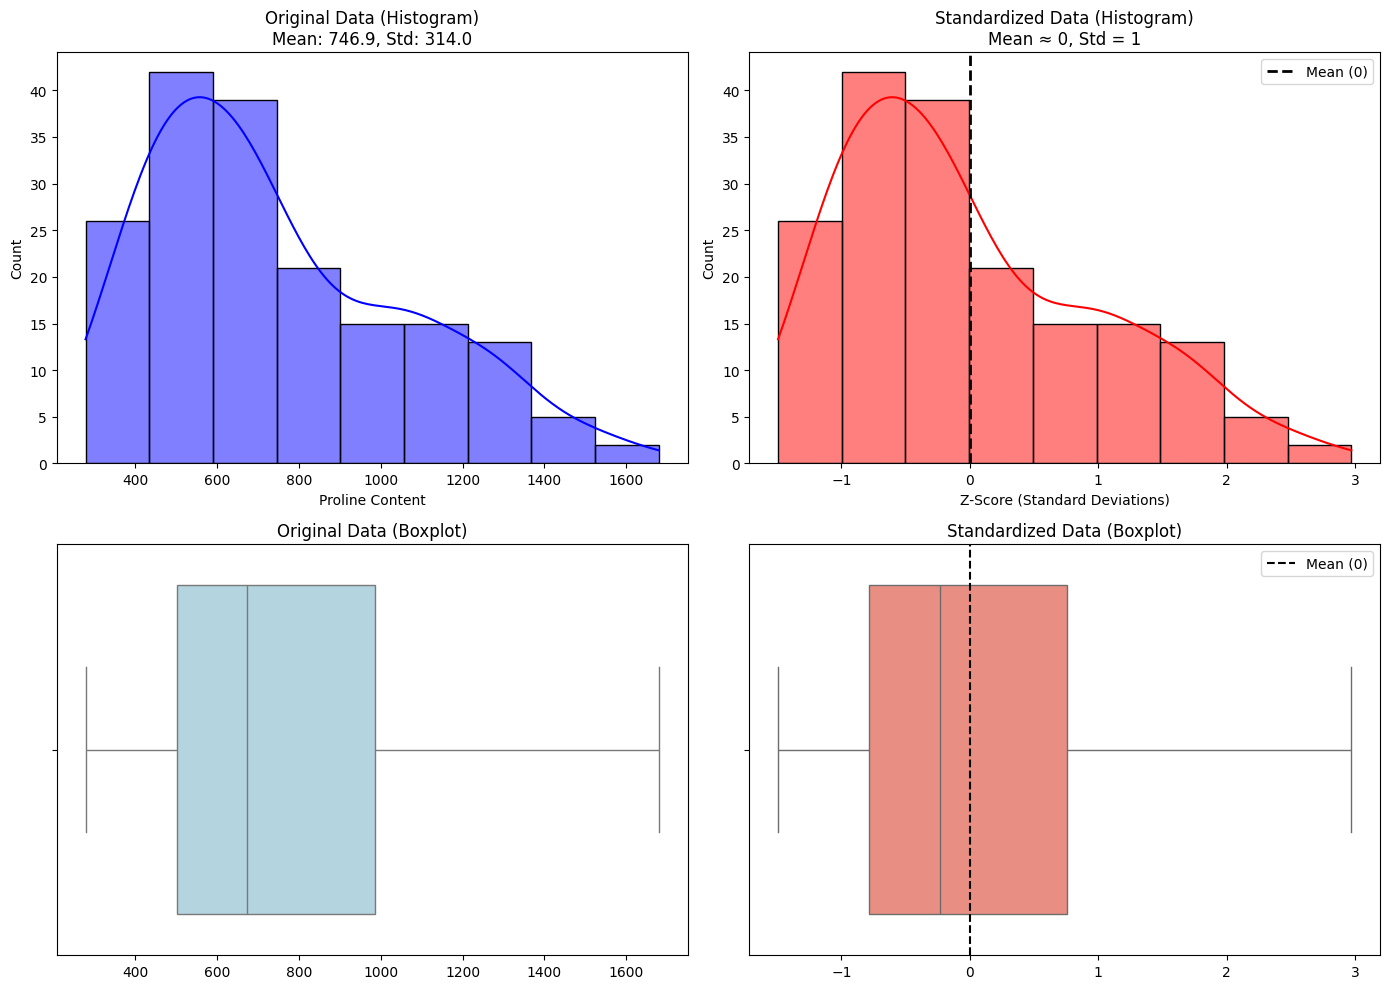

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load Data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
feature = df[['proline']].values.flatten()

# 2. Apply StandardScaler
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(feature.reshape(-1, 1)).flatten()

# 3. Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Row 1: Histograms (Best for checking Normal Distribution) ---
# Original
sns.histplot(feature, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title(f"Original Data (Histogram)\nMean: {feature.mean():.1f}, Std: {feature.std():.1f}")
axes[0, 0].set_xlabel("Proline Content")

# Standardized
sns.histplot(scaled_feature, ax=axes[0, 1], kde=True, color='red')
axes[0, 1].set_title("Standardized Data (Histogram)\nMean ≈ 0, Std = 1")
axes[0, 1].set_xlabel("Z-Score (Standard Deviations)")
# Draw the Mean line
axes[0, 1].axvline(0, color='black', linestyle='--', linewidth=2, label='Mean (0)')
axes[0, 1].legend()

# --- Row 2: Boxplots (Best for checking Range) ---
sns.boxplot(x=feature, ax=axes[1, 0], color='lightblue')
axes[1, 0].set_title("Original Data (Boxplot)")

sns.boxplot(x=scaled_feature, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title("Standardized Data (Boxplot)")
axes[1, 1].axvline(0, color='black', linestyle='--', label='Mean (0)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

RobustScaler uses the Median.


It is "robust" because it ignores extreme outliers (like one weirdly expensive wine) so they don't mess up the scaling for the regular wines.

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load the Wine Dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Select the 'proline' feature
feature_stand = df[['proline']].values

# 3. Create the Robust Scaler
# This scales data using the Median and Interquartile Range (IQR)
robust_scaler = preprocessing.RobustScaler()

# 4. Transform the feature
robust_scaled = robust_scaler.fit_transform(feature_stand)

# 5. Print the results
print("\n Using RobustScaler ")
print("Robust Scaled feature (first 5):\n", robust_scaled[:5])

# Optional: Verify Median is now 0 (instead of Mean being 0)
import numpy as np
print(f"Median after Robust Scaling: {np.median(robust_scaled)} (Should be 0.0)")


-- Using RobustScaler --
Robust Scaled feature (first 5):
 [[0.80804954]
 [0.77708978]
 [1.05572755]
 [1.66460268]
 [0.12693498]]
Median after Robust Scaling: 0.0 (Should be 0.0)


Boxplots (for checking the median/outliers) and Histograms (for checking the distribution shape). of RobustScaler  feature use proline

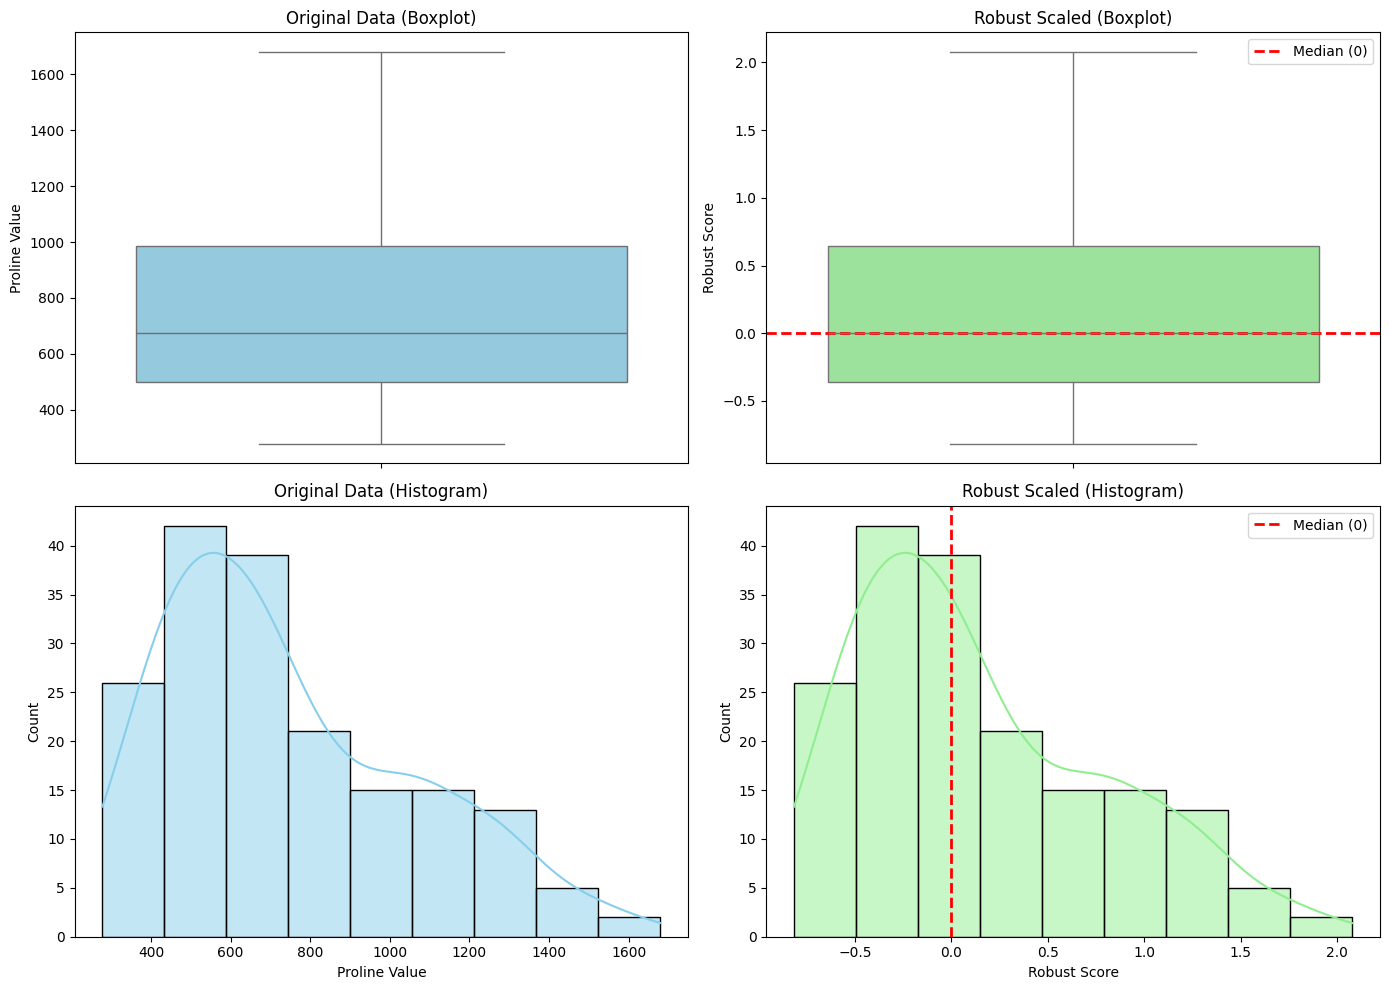

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load Data
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
feature = df[['proline']].values.flatten() # Flatten to 1D array

# 2. Apply Robust Scaler
robust_scaler = preprocessing.RobustScaler()
# We reshape to (-1, 1) because fit_transform expects 2D array
robust_scaled = robust_scaler.fit_transform(feature.reshape(-1, 1)).flatten()

# 3. Create Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Row 1: Boxplots (The Best for RobustScaler) ---
# Original
sns.boxplot(y=feature, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Original Data (Boxplot)")
axes[0, 0].set_ylabel("Proline Value")

# Scaled
sns.boxplot(y=robust_scaled, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title("Robust Scaled (Boxplot)")
axes[0, 1].set_ylabel("Robust Score")
# Draw a red line at 0 to prove the Median is centered there
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=2, label='Median (0)')
axes[0, 1].legend()

# --- Row 2: Histograms (To see distribution shape) ---
# Original
sns.histplot(feature, ax=axes[1, 0], kde=True, color='skyblue')
axes[1, 0].set_title("Original Data (Histogram)")
axes[1, 0].set_xlabel("Proline Value")

# Scaled
sns.histplot(robust_scaled, ax=axes[1, 1], kde=True, color='lightgreen')
axes[1, 1].set_title("Robust Scaled (Histogram)")
axes[1, 1].set_xlabel("Robust Score")
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Median (0)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Normalization scales each row (each wine sample) so that the total "length" (magnitude) of its values equals 1.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_wine

# 1. Load the Wine Dataset
data = load_wine()
df_full = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Select first 3 features for demonstration
# (Alcohol, Malic Acid, Ash)
features_norm_input = df_full.iloc[:, :3].values

# 3. Create Normalizer
# 'l2' norm means Euclidean distance (straight line length)
normalizer = preprocessing.Normalizer(norm="l2")

# 4. Transform the features
features_normalized = normalizer.transform(features_norm_input)

# 5. Print Results
print("\n Normalizing Observations (Normalizer) ")
print("Original Observations (first 5 rows, 3 features):\n", features_norm_input[:5])
print("\nNormalized Observations (first 5 rows):\n", features_normalized[:5])

# 6. Verify the Math
# The 'Length' (Norm) of every single row should now be exactly 1.0
norm_val = np.linalg.norm(features_normalized[0])
print(f"\nEuclidean norm of first observation: {norm_val}")


--- 4.3 Normalizing Observations (Normalizer) ---
Original Observations (first 5 rows, 3 features):
 [[14.23  1.71  2.43]
 [13.2   1.78  2.14]
 [13.16  2.36  2.67]
 [14.37  1.95  2.5 ]
 [13.24  2.59  2.87]]

Normalized Observations (first 5 rows):
 [[0.97888719 0.11763156 0.16716064]
 [0.97848136 0.13194673 0.15863258]
 [0.96523879 0.17309753 0.19583492]
 [0.97651355 0.13251228 0.16988754]
 [0.95991792 0.18777851 0.20807888]]

Euclidean norm of first observation: 0.9999999999999999


Visualizing Normalization

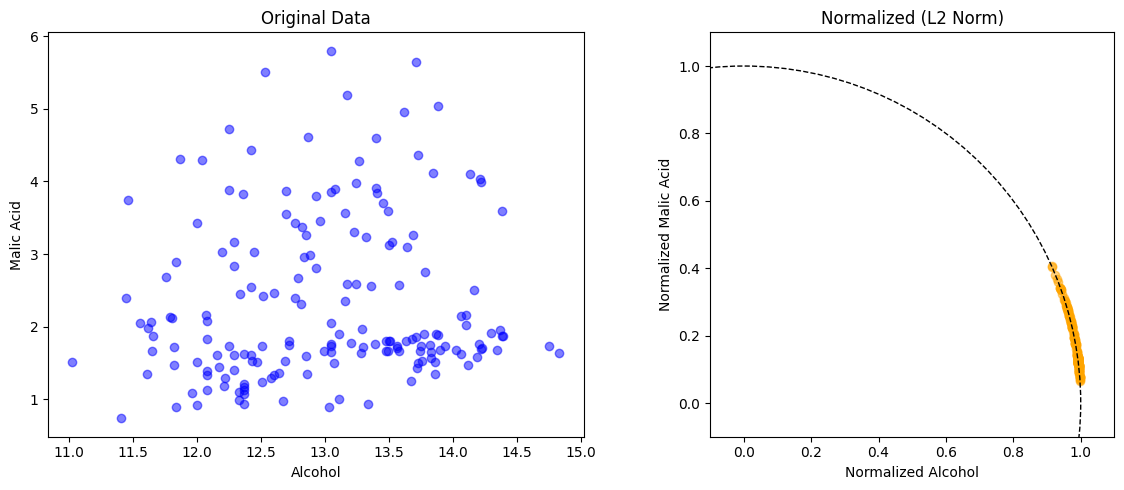

In [ ]:
import matplotlib.pyplot as plt

# We use just 2 features for the plot so we can see the "Unit Circle" effect
X_2d = features_norm_input[:, :2]
X_norm_2d = normalizer.transform(X_2d)

plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], color='blue', alpha=0.5)
plt.title("Original Data")
plt.xlabel("Alcohol"); plt.ylabel("Malic Acid")

# Normalized Data
plt.subplot(1, 2, 2)
plt.scatter(X_norm_2d[:, 0], X_norm_2d[:, 1], color='orange', alpha=0.5)
plt.title("Normalized (L2 Norm)")
plt.xlabel("Normalized Alcohol"); plt.ylabel("Normalized Malic Acid")

# Draw the Unit Circle to show where points landed
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Fix axes to show the circle clearly
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()

Grouping Observations Using Clustering                                      uses Clustering (K-Means) to group the wines into 3 different "types" based purely on their alcohol and acidity levels.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# 1. Load the Wine Dataset
data = load_wine()
df_full = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Select Features for Clustering
# We use 'alcohol' and 'malic_acid' to make it easy to visualize in 2D
features_cluster = df_full[['alcohol', 'malic_acid']].values

# 3. Create the DataFrame for results
df_cluster = pd.DataFrame(features_cluster, columns=["alcohol", "malic_acid"])

# 4. Create and Fit the Clusterer
# We ask for 3 clusters (n_clusters=3) because we know there are 3 specific types of wine in this dataset
clusterer = KMeans(n_clusters=3, random_state=0)
clusterer.fit(features_cluster)

# 5. Predict the Groups
# The model assigns a group number (0, 1, or 2) to every row
df_cluster['group'] = clusterer.predict(features_cluster)

# 6. Print the results
print("\n Grouping Observations Using Clustering (KMeans) ")
print(df_cluster.head())




--- 4.9 Grouping Observations Using Clustering (KMeans) ---
   alcohol  malic_acid  group
0    14.23        1.71      1
1    13.20        1.78      1
2    13.16        2.36      1
3    14.37        1.95      1
4    13.24        2.59      1


VISUALIZATION

Before: It looks like one big blob of data. It's hard to say where one group ends and another begins.

After: The K-Means algorithm has successfully sliced the data into three distinct regions (Purple, Teal, and Yellow). Notice how it draws "boundaries" between the groups based on distance.

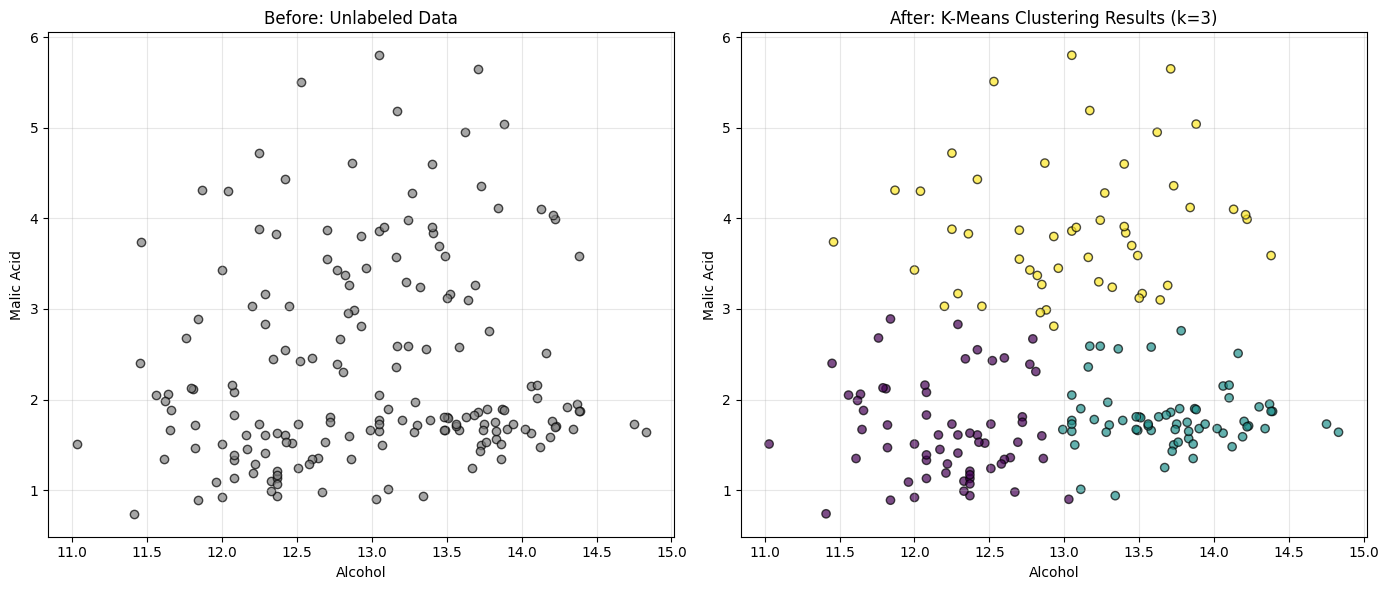

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

# 1. Load the Wine Dataset
data = load_wine()
df_full = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Select Features
features_cluster = df_full[['alcohol', 'malic_acid']].values
df_cluster = pd.DataFrame(features_cluster, columns=["alcohol", "malic_acid"])

# 3. Perform Clustering
clusterer = KMeans(n_clusters=3, random_state=0)
clusterer.fit(features_cluster)
df_cluster['group'] = clusterer.predict(features_cluster)

# --- VISUALIZATION: BEFORE vs AFTER ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Before (Raw Data)
axes[0].scatter(df_cluster['alcohol'], df_cluster['malic_acid'], c='gray', edgecolors='k', alpha=0.7)
axes[0].set_title("Before: Unlabeled Data")
axes[0].set_xlabel("Alcohol")
axes[0].set_ylabel("Malic Acid")
axes[0].grid(True, alpha=0.3)

# Graph 2: After (Clustered)
# We use 'c=df_cluster['group']' to color based on the cluster ID
axes[1].scatter(df_cluster['alcohol'], df_cluster['malic_acid'], c=df_cluster['group'], cmap='viridis', edgecolors='k', alpha=0.7)
axes[1].set_title("After: K-Means Clustering Results (k=3)")
axes[1].set_xlabel("Alcohol")
axes[1].set_ylabel("Malic Acid")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Deleting Observations with Missing Values

This method is the "scorched earth" approach to missing data: If a row is broken, delete the entire row.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# 1. Load Data
data = load_wine()
df_full = pd.DataFrame(data.data, columns=data.feature_names)

# 2. Create a problem (Introduce Missing Values)
# We take a small slice (10 rows) to make it easy to see
features_missing = df_full.iloc[:10, :2].copy()

# We artificially break the data by deleting two values
features_missing.iloc[0, 0] = np.nan  # Delete Alcohol in Row 0
features_missing.iloc[3, 1] = np.nan  # Delete Malic Acid in Row 3

print("--- Before: Data with Missing Values ---")
print(features_missing)

# 3. The Solution: Drop Missing Values
# The dropna() function checks every row. If it finds even ONE "NaN", it deletes the whole row.
df_dropped = features_missing.dropna()

print("\n--- After: Data with Deleted Rows ---")
print(df_dropped)



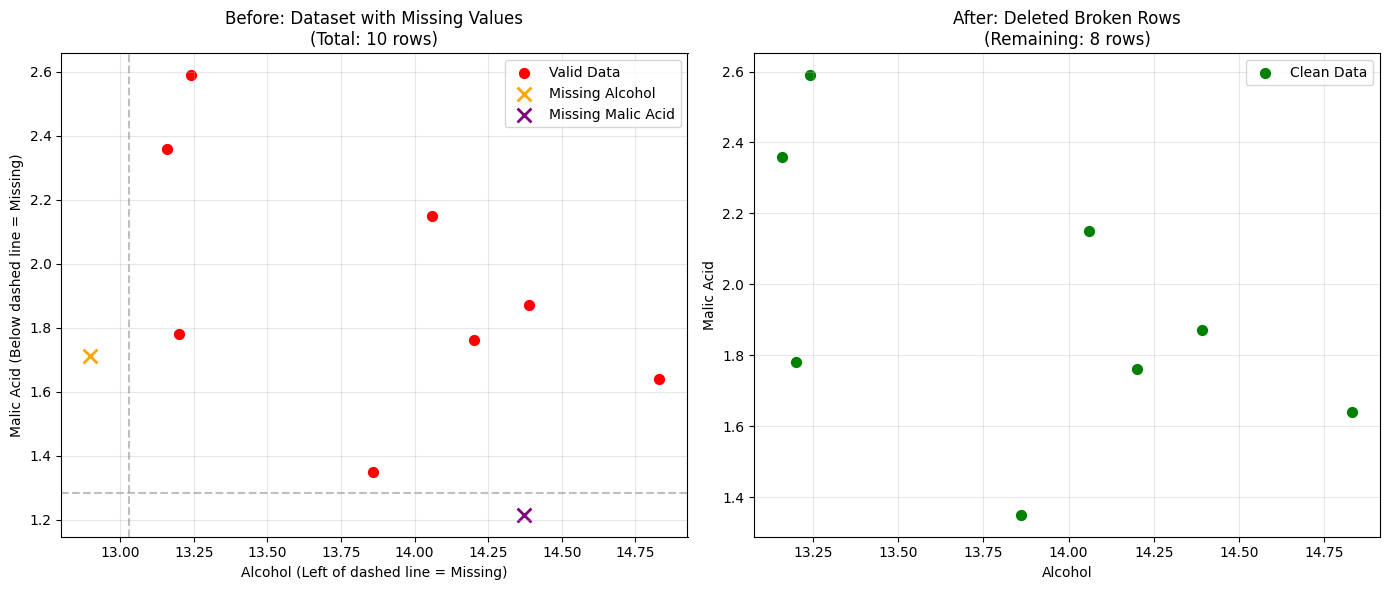

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# --- STEP 1: SETUP & DATA CREATION ---
data = load_wine()
df_full = pd.DataFrame(data.data, columns=data.feature_names)

# Create subset (10 rows)
features_missing = df_full.iloc[:10, :2].copy()

# Artificially break the data (Add NaNs)
features_missing.iloc[0, 0] = np.nan  # Missing Alcohol in row 0
features_missing.iloc[3, 1] = np.nan  # Missing Malic Acid in row 3

# --- STEP 2: DELETE MISSING VALUES ---
df_dropped = features_missing.dropna()

# --- STEP 3: VISUALIZATION ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Graph 1: Before (Visualizing NaNs) ---
# To show NaN values, we place them in a "Ghost Zone" just outside the data range
x_min = features_missing['alcohol'].min()
y_min = features_missing['malic_acid'].min()
x_ghost = x_min * 0.98  # Shift slightly left for missing X
y_ghost = y_min * 0.90  # Shift slightly down for missing Y

# 1. Plot Valid Data
valid_data = features_missing.dropna()
axes[0].scatter(valid_data['alcohol'], valid_data['malic_acid'], c='red', label='Valid Data', s=50)

# 2. Plot Rows with Missing Alcohol (Use ghost X coordinate)
missing_alcohol = features_missing[features_missing['alcohol'].isna()]
axes[0].scatter([x_ghost] * len(missing_alcohol), missing_alcohol['malic_acid'],
                c='orange', marker='x', s=100, label='Missing Alcohol', linewidth=2)

# 3. Plot Rows with Missing Malic Acid (Use ghost Y coordinate)
missing_malic = features_missing[features_missing['malic_acid'].isna()]
axes[0].scatter(missing_malic['alcohol'], [y_ghost] * len(missing_malic),
                c='purple', marker='x', s=100, label='Missing Malic Acid', linewidth=2)

# Draw lines to separate the "Ghost Zone" from real data
axes[0].axvline(x_min * 0.99, color='gray', linestyle='--', alpha=0.5)
axes[0].axhline(y_min * 0.95, color='gray', linestyle='--', alpha=0.5)

axes[0].set_title(f"Before: Dataset with Missing Values\n(Total: {len(features_missing)} rows)")
axes[0].set_xlabel("Alcohol (Left of dashed line = Missing)")
axes[0].set_ylabel("Malic Acid (Below dashed line = Missing)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# --- Graph 2: After (Dropped) ---
axes[1].scatter(df_dropped['alcohol'], df_dropped['malic_acid'], c='green', label='Clean Data', s=50)
axes[1].set_title(f"After: Deleted Broken Rows\n(Remaining: {len(df_dropped)} rows)")
axes[1].set_xlabel("Alcohol")
axes[1].set_ylabel("Malic Acid")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

imputation using SimpleImputer (the modern replacement for the PDF's Imputer)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_wine

# --- STEP 1: SETUP & DATA LOADING ---
data = load_wine()
df_full = pd.DataFrame(data.data, columns=data.feature_names)

# We use a subset of data for this example (first 100 rows, first 2 columns)
features_impute_setup = df_full.iloc[:100, :2].values

# --- STEP 2: STANDARDIZE (As per PDF instruction) ---
# The PDF example standardizes the data first. This changes the scale so Mean ≈ 0.
scaler_imp = preprocessing.StandardScaler()
standardized_features_imp = scaler_imp.fit_transform(features_impute_setup)

# --- STEP 3: INTRODUCE MISSING VALUE ---
# Save the actual true value so we can compare later
true_value = standardized_features_imp[0, 0]

# Artificially set the first value to NaN (Missing)
standardized_features_imp[0, 0] = np.nan

# --- STEP 4: IMPUTE (FILL) THE MISSING VALUE ---
# Create the Imputer.
# strategy="mean" tells it to calculate the average of the remaining numbers and use that.
mean_imputer = SimpleImputer(strategy="mean")
features_mean_imputed = mean_imputer.fit_transform(standardized_features_imp)

# Get the new filled value
imputed_value = features_mean_imputed[0, 0]

print(f"True Original Value: {true_value}")
print(f"Imputed Value (Mean): {imputed_value}")



True Original Value: 1.2552930728289073
Imputed Value (Mean): -0.01267972800836974


generate a graph that visualizes the difference between the True Value and the Imputed (Guessed) Value.

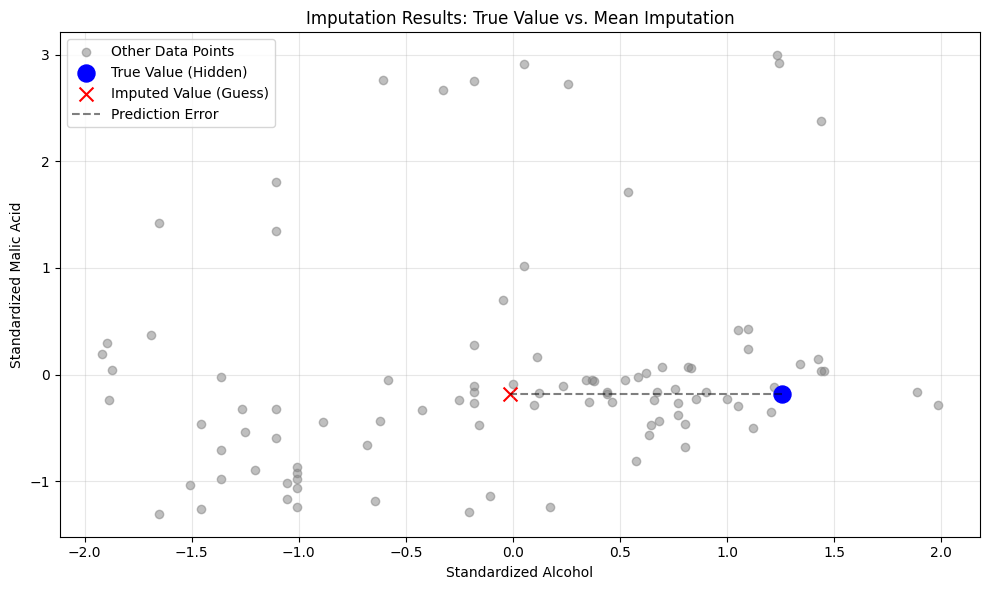

In [ ]:
#  VISUALIZATION
plt.figure(figsize=(10, 6))

# 1. Plot all other points (Context)
# We plot Feature 0 vs Feature 1 for context
plt.scatter(standardized_features_imp[1:, 0], standardized_features_imp[1:, 1],
            c='gray', alpha=0.5, label='Other Data Points')

# 2. Plot the True Value (The original point)
# We use the true X value and the existing Y value
y_val = standardized_features_imp[0, 1]
plt.scatter(true_value, y_val, c='blue', s=150, label='True Value (Hidden)', marker='o')

# 3. Plot the Imputed Value (The computer's guess)
plt.scatter(imputed_value, y_val, c='red', s=100, label='Imputed Value (Guess)', marker='x')

# Draw a line connecting them to show the "Error"
plt.plot([true_value, imputed_value], [y_val, y_val], 'k--', alpha=0.5, label='Prediction Error')

plt.title("Imputation Results: True Value vs. Mean Imputation")
plt.xlabel("Standardized Alcohol")
plt.ylabel("Standardized Malic Acid")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

For the Wine Recognition Dataset, there isn't one single "best" method because it depends on what you want to do with the data (e.g., classification, clustering, or visualization).

However, based on the characteristics of this specific data, here is the recommendation:

 Standardization (StandardScaler)
Reason: The Wine dataset has features with wildly different scales.

Proline: Ranges from 278 to 1,680 (Mean ≈ 746).

Nonflavanoid Phenols: Ranges from 0.13 to 0.66 (Mean ≈ 0.36).

If you feed this raw data into most machine learning models (like Support Vector Machines, K-Nearest Neighbors, or Logistic Regression):

The model will treat Proline as the most important feature simply because the numbers are huge.

It will practically ignore features like Phenols because the numbers are tiny.

StandardScaler fixes this by making every feature contribute equally (Mean = 0, Std = 1) while preserving the useful information about outliers and distribution shapes.

 Rescaling (MinMaxScaler)
When to use it: If you plan to use a Neural Network or an algorithm that specifically requires bounded input (like 0 to 1). Neural networks often converge faster when inputs are small and positive. However, MinMaxScaler is very sensitive to outliers, which the Wine dataset does contain.